# SysML v2 Library for STPA

In [78]:
library package LibrarySTPA {
    
    private import ScalarValues::*;
    private import Views::*;
    
    doc /*  
        This library contains the System-Theoretic Process Analysis (STPA) Language Extension for SysML v2. 
        The package is structured according to the four steps of the STPA:
        1. Defining the purpose of the analysis
        2. Modelling the control structure
        3. Identifying unsafe control control actions
        4. Identifying loss scenarios
        In addition, two package to improve usability of the library are included:
        5. Defines MetaData for relevant STPA types 
        6. Defines Views and Viewpoints for STPA activities
    */

    package DefineAnalysisPurpose {
        doc /*  
            This package contains the elements related to the first step of the STPA. 
            The first step covers the definition of losses and hazards
            as the baseline for the analysis.
        */

        part def Loss {
            doc /* 
                Definition:
                Represent the act or fact of being unable to keep or
                maintain something valued by a stakeholder.
                Losses may include harm to people, property losses,
                environmental losses, mission losses, 
                loss of system performance, reputation losses, or 
                any other relevant losses determined by the stakeholders. 
                
                Model-Based Composition:
                Loss = ⟨StateOfConcern⟩ & ⟨StakeholderConcern⟩
                
                Example:
                ⟨Loss of⟩ ⟨life⟩.
            */
            attribute stateOfConcern : StateOfConcern;
            concern stakeholderConcern;
            attribute description : String;
        }
        part losses[*] : Loss;
        
        enum def StateOfConcern {
            'Loss of';
            'Occurence of';
        }
        
        part def Hazard {
            doc /* 
                Definition:
                Represents a system state or set of conditions that together with a 
                particular set of worst-case environmental conditions, will lead to a loss.
                
                Model-Based Composition:
                Hazard = ⟨System⟩ & ⟨UnsafeCondition⟩ & [Losses]
                
                Example:
                ⟨Automated vehicle⟩ ⟨loses control⟩ resulting in [loss of life].
             */
            part system[1];
            attribute unsafeCondition[1] : String;
            ref part linkedLosses[1..*] : Loss;
            attribute description[1] : String;
        }
        part hazards[*] : Hazard;
    }
    package ModelControlStructure {
        doc /* 
            This package contains the elements related to the second step of the STPA. 
            The second step covers the modelling of the control structure.
        */ 

        part def ControlStructure {
            doc /* 
                Definition:
                Represents a hierarchical structure that models the layers of control in a system. 
                Each level imposes constraints on the activities of the levels below, and each level may receive feedback or other information about the levels below. 
                Control structures model the relationships and interactions between controllers, controlled processes, control actions, feedback, and other information.
                
                Example:
                A control oriented model showing the interactions of an automated vehicle with related systems and people.
            */
            part actuator[*] : Actuator;
            part sensor[*] : Sensor;
            part process[*] : Process;
            part controller[*] : Controller;
            item controlAction[*] : ControlAction;
            item feedback[*] : Feedback;
            item otherInformation[*] : OtherInformation;
            attribute description[1] : String;
        }
        part controlStructures[*] : ControlStructure;
        
        part def Controller {
            doc /* 
                Definition:
                Represents an entity that forms beliefs, makes decisions, and provides control actions to achieve or maintain a state or goal.

                Example:
                ControlElectronics of an automated vehicle.
            */
            part processModels[*] : ProcessModel;
            attribute description[1] : String;
        }
        part controllers[*] : Controller;
        
        part def HumanController :> Controller {
            doc /* 
                Definition:
                Represents a human that takes over controller related activities.
                
                Example:
                Teleoperator which makes decisions about the operation of an automated vehicle.
            */
            part mentalModels : MentalModel;
        }
        part humanControllers[*] : HumanController;
        
        part def ProcessModel {
            doc /*
                Definition:
                A representation of a controller’s internal beliefs used to make decisions. 
                Process models may include beliefs about the controlled process or other relevant aspects of the system or the environment. 
                Process models may be partly updated by feedback used to observe the controlled process.
                
                Example:
                Navigation map used by the ControlElectronics of the automated vehicle. 
            */
            attribute description[1] : String;
        }
        part processModels[*] : ProcessModel;
        
        part def MentalModel :> ProcessModel {
            doc /*
                Definition:
                A representation of someone's thought process about how something works in the real world. 
                It describes the surrounding world, the relationships between its various parts, and a person's intuitive perception about their own acts and consequences.
                
                Example:
                Teleoperator's idea of which vehicle he supervises.
            */
        }
        part mentalModels[*] : MentalModel;
        
        part def Actuator {
            doc /* 
                Definition:
                Represents an entity in the control structure which executes a control action by a controller.

                Example:
                Brake of the automated vehicle.
            */
            attribute description[1] : String;
        }
        part actuators[*] : Actuator;
        
        part def Sensor {
            doc /* 
            Definition:
            Represents an entitiy in the control structure which provides feedback to a controller.
            
            Example:
            Perception system of automated vehicle.
            */
            attribute description[1] : String;
        }
        part sensors[*] : Sensor;
        
        part def Process {
            doc /* 
                Definition:
                Represents any process, such as a physical process, a virtual process, a controller, or other processes 
                that receives control actions from and provides feedback to higher-level controllers in a control structure.  
                Processes with specified restrictions that bound the performance of its intended behavior.
                
                Example:
                Movement of the automated vehicle.
            */
            attribute description[1] : String;
        }
        part processes[*] : Process;

        item def ControlAction {
            doc /* 
                Definition:
                Represents a command, instruction, or other directive 
                provided by a controller to control a process and achieve goals.

                Example:
                Teleopartor command.
            */
            attribute description : String;
        }
        item controlActions[*] : ControlAction;
        
        item def Feedback {
            doc /* 
            Definition:
            Represents a value, measurement or other information provided to a controller to achieve its goals.
            
            Example:
            Camera images.
            */
            attribute description[1] : String;
        }
        item feedbacks[*] : Feedback;
        
        item def OtherInformation {
            doc /*
            Definition:
            Represents values that may come from other processes, other controllers, or other sources in the system or the environment.
            
            Example:
            Sunlight from the environment.
            */
            attribute description[1] : String;
        }
        item otherInformation[*] : OtherInformation;
    }

    package IdentifyUCAs {
        doc /* 
            This package contains the elements related to the third step of the STPA. 
            The third step covers the identification of unsafe control actions.
        */
            
        part def Context {
            doc /* 
                Definition:
                Conditions where a control action may be unsafe.
                Context can be a state of the system or the state of the operational environment.

                Example:
                Environmental Context = A road closure within a one way street.
                System Context = An automated vehicle is in an emergency state.
            */
            attribute description[1] : String;
            part environmentalCondition : EnvironmentalCondition;
            part systemCondition : SystemCondition;
        }
        part contexts[*] : Context;
        part def EnvironmentalCondition;
        part environmentalConditions[*] : EnvironmentalCondition;
        part def SystemCondition;
        part systemConditions[*] : SystemCondition;
            
        enum def TypesOfCA {
            doc /* 
                Definition:
                Represents different types of how a control action can be unsafe.

                Example:
                Teleoperator command is NotProvided.
            */
            NotProvided;
            Provided;
            ProvidedIncorrectly;
            ProvidedTooLate;
            ProvidedTooSoon;
            ProvidedOutOfOrder;
        }
        enum typesOfCA[*] : TypesOfCA;
    
        item def UnsafeControlAction :> ModelControlStructure::ControlAction {
            doc /* 
                Definition:
                Represents a control action that, in a particular context, will lead to a hazard, 
                and may eventually, given worst-case environmental conditions, lead to losses.

                Model-Based Composition:
                UCA = ⟨Source⟩ & ⟨Type⟩ & ⟨ControlAction⟩ & ⟨Receiver⟩ & ⟨Context⟩ & [Hazards]

                Example:
                UCA = The ⟨teleoperator⟩ ⟨does not provide⟩ the ⟨operation command⟩ to the ⟨automated vehicle⟩ 
                ⟨during a complex traffic situation⟩ leading to [H1 - the vehicle not being able to continue its mission].
            */
            part source[1] : ModelControlStructure::Controller;
            enum type[1] : TypesOfCA;
            item controlAction[1] : ModelControlStructure::ControlAction;
            part receiver[1] : ModelControlStructure::Controller, ModelControlStructure::Actuator;
            part contextUCA[1] : Context;
            ref part linkedHazards[1..*] : DefineAnalysisPurpose::Hazard;
        }
        item unsafeControlActions[*] : UnsafeControlAction;
        
        item def UnwantedControlAction :> UnsafeControlAction;
        item unwantedControlActions[*] : UnwantedControlAction;
        item def UnsecureControlAction :> UnsafeControlAction;
        item unsecureControlAction[*] : UnsecureControlAction;
    }

    package IdentifyLSs {
        doc /* 
            This package contains the elements related to the fourth step of the STPA. 
            The fourth step covers the identification of loss scenarios. 
        */
        
        part def CausalFactor {
            doc /*
                Definition:
                Represents a circumstance, fact, or influence contributing to a causal scenario. 
                Causal factors can include: interactions, process models, contextual variables, etc.

                Example:
                Interaction = ⟨Teleoperator command⟩ & ⟨not forwarded⟩.
                Process model = ⟨Teloperators awareness of vehicles under observation⟩ & ⟨is incorrect⟩.
                
            */
            part factor : ModelControlStructure::ControlAction, ModelControlStructure::Feedback, 
                ModelControlStructure::OtherInformation, ModelControlStructure::ProcessModel, 
                IdentifyUCAs::EnvironmentalCondition, IdentifyUCAs::SystemCondition;
            attribute status : String;
        }
        part causalFactors[*] : CausalFactor;
        
        part def LossScenario {
            doc /*
                Definition:
                Represents the causal factors that can lead to unsafe control actions and to hazards.
                
                Model-Based Composition:
                LS = ⟨CausalFactors⟩ & [UCAs]

                Example:
                ⟨Teleoperator command⟩ & ⟨not forwarded⟩ leading to [UCA1]
                ⟨Teleoperators awareness of vehicles under observation⟩ & ⟨is incorrect⟩ leading to [UCA2]  
            */
            part scenarioFactors[1..*] : IdentifyLSs::CausalFactor;
            ref item ucas[1..*] : IdentifyUCAs::UnsafeControlAction;
            attribute description [1] : String;
        }
        part lossScenarios[*] : LossScenario;
    }
    
    
    package MetaTypesSTPA {
        doc /* 
            This package contains all the meta types for the STPA library elements
        */    

        ////////// Define Analysis Purpose Meta Types //////////
        metadata def <loss> L :> Metaobjects::SemanticMetadata {
        :>> baseType = DefineAnalysisPurpose::losses meta SysML::PartUsage;
        }
        metadata def <hazard> H :> Metaobjects::SemanticMetadata {
            :>> baseType = DefineAnalysisPurpose::hazards meta SysML::PartUsage;
        }   

        ////////// Model Control Structure Meta Types  //////////
        metadata def <controlStructure> :> Metaobjects::SemanticMetadata {
            :>> baseType = ModelControlStructure::controlStructures meta SysML::PartUsage;
        }
        
        metadata def <controller> :> Metaobjects::SemanticMetadata {
          :>> baseType = ModelControlStructure::controllers meta SysML::PartUsage;
        }
        
        metadata def <controllerHuman> :> Metaobjects::SemanticMetadata {
          :>> baseType = ModelControlStructure::humanControllers meta SysML::PartUsage;
        }

        metadata def <actuator> :> Metaobjects::SemanticMetadata {
          :>> baseType = ModelControlStructure::actuators meta SysML::PartUsage;
        }

        metadata def <sensor> :> Metaobjects::SemanticMetadata {
          :>> baseType = ModelControlStructure::sensors meta SysML::PartUsage;
        }

        metadata def <process> :> Metaobjects::SemanticMetadata {
          :>> baseType = ModelControlStructure::processes meta SysML::PartUsage;
        }
        
        metadata def <controlAction> :> Metaobjects::SemanticMetadata {
          :>> baseType = ModelControlStructure::controlActions meta SysML::ItemUsage;
        }
        
        metadata def <feedback> :> Metaobjects::SemanticMetadata {
          :>> baseType = ModelControlStructure::feedbacks meta SysML::ItemUsage;
        }
        
        metadata def <processModel> :> Metaobjects::SemanticMetadata {
          :>> baseType = ModelControlStructure::processModels meta SysML::PartUsage;
        }
        
        metadata def <mentalModel> :> Metaobjects::SemanticMetadata {
          :>> baseType = ModelControlStructure::mentalModels meta SysML::PartUsage;
        }
        
        ////////// Identify UCA Meta Types //////////
        metadata def <uca> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyUCAs::unsafeControlActions meta SysML::PartUsage;
        }
        
        metadata def <envCon> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyUCAs::environmentalConditions meta SysML::PartUsage;
        }
        
        metadata def <sysCon> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyUCAs::systemConditions meta SysML::PartUsage;
        }
        
        metadata def <context> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyUCAs::contexts meta SysML::PartUsage;
        }
        
        ////////// Identify LSs Meta Types //////////
        metadata def <cf> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyLSs::causalFactors meta SysML::PartUsage;
        }
        
        metadata def <ls> :> Metaobjects::SemanticMetadata {
            :>> baseType = IdentifyLSs::lossScenarios meta SysML::PartUsage;
        }
    }
    
    package ViewsAndViewpoints {
        import MetaTypesSTPA::*;
        
        doc /* 
            This package contains all the views and viewpoints for the utilization of the STPA library elements
        */    
        
        package DefineAnalysisPurposeViews {            
            viewpoint DefineLosses {
                doc /* It should be possible to define and show all losses of the system of interest */
                view def LossTree {
                    doc /* A tree diagram is one possibility to create and manage losses */
                    satisfy DefineLosses;
                    render asTreeDiagram;
                    filter @loss;
                }
            }
            viewpoint DefineHazards {
                doc /* It should be possible to define and show all hazards of the system of interest */
                view def HazardTree {
                    doc /* A tree diagram is one possibility to create and manage hazards */
                    satisfy DefineHazards;
                    render asTreeDiagram;
                    filter @hazard;
                }
            }
            viewpoint MapLossesToHazards {
                doc /* It should be possible to map every loss to at least one hazard */
                view def LossesToHazardsMatrix {
                    doc /* A relationship matrix is one possibility to create and manage relationships 
                        between losses and hazards */
                    satisfy MapLossesToHazards;
                    filter @hazard and @loss;
                    //render asRelationshipMatrix;
                }
            }
        }
        package ModelControlStructureViews {
            viewpoint ModelControlStructure {
                doc /* It should be possible to model the control structure with elements 
                and interactions of the system of interest */
                view def ControlStructureInterconnection {
                    doc /* An interconnection diagram is one possibility to create and manage a control structure */
                    satisfy ModelControlStructure;
                    render asInterconnectionDiagram;
                    filter @controlStructure and @controller and @controllerHuman and @actuator and @process 
                        and @sensor and @controlAction and @feedback and @mentalModel and @processModel;
                }
            }
        }
        
        package IdentifyUCAsViews {
            viewpoint DefineContext {
                doc /* It should be possible to define the context of the system of interest */
                view def ContextTable {
                    doc /* An element table is one possibility to create and manage the context */
                    satisfy DefineContext;
                    render asElementTable;
                    filter @context;
                }
            }
            viewpoint IdentifyUCAs {
                doc /* It should be possible to identify UCAs for the system of interest */
                view def UCAsTable {
                    doc /* An element table is one possibility to create and manage UCAs */
                    satisfy IdentifyUCAs;
                    render asElementTable;
                    filter @uca;
                }
            }
        }
        package IdentifyLSsViews {
            viewpoint IdentifyLSs {
                doc /* It should be possible to identify LSs for the system of interest */
                view def LSsTable {
                    doc /* An element table is one possibility to create and manage LSs */
                    satisfy IdentifyLSs;
                    render asElementTable;
                    filter @ls;
                }
            }
            viewpoint MapUCAsToLSs {
                doc /* It should be possible to map at least one UCA to each loss scenario */
                view def LSsToUCAsMatrix {
                    doc /* A relationship matrix is one possibility to create and manage relationships between LSs and UCAs */
                    satisfy MapUCAsToLSs;
                    //render asRelationshipMatrix;
                    filter @ls and @uca;
                }
            }
        }
    }
}

LibraryPackage LibrarySTPA (7ba26461-30e8-4cb9-a43d-70d75ad1ba7a)


## Library Package 1: First Step of STPA - Define Analysis Purpose

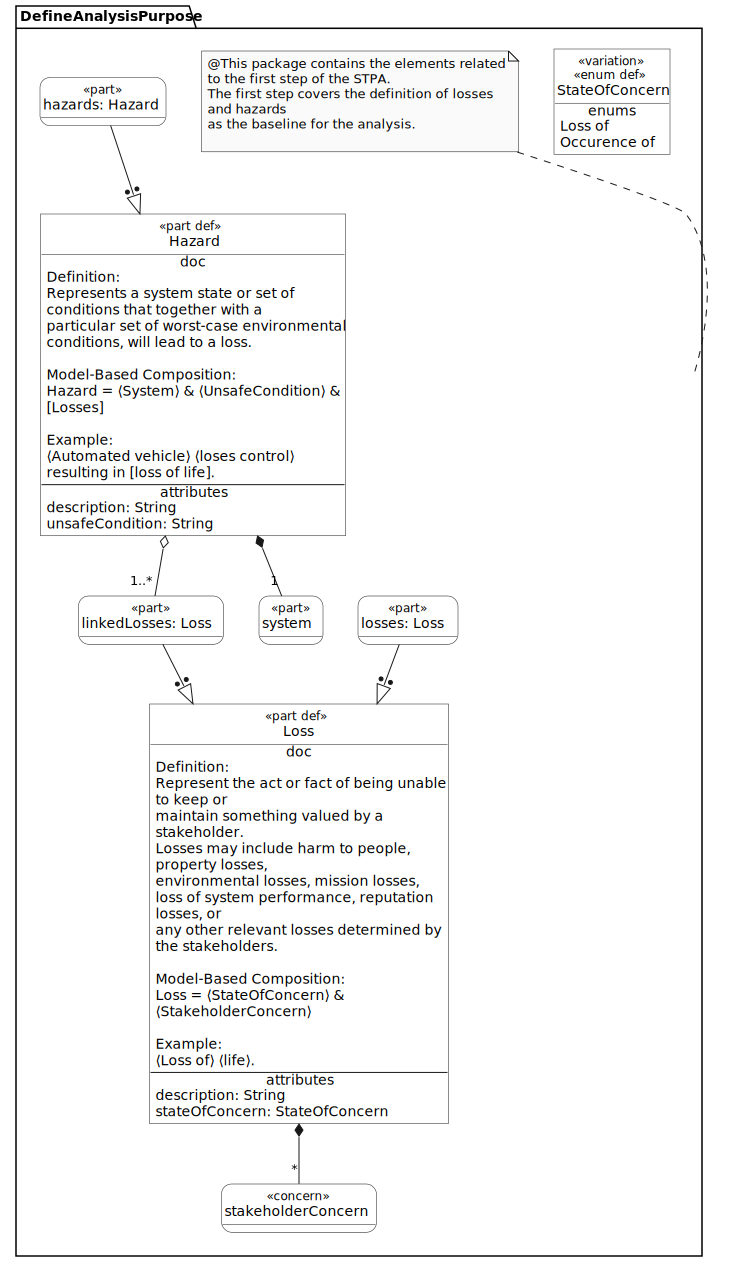

In [79]:
%viz LibrarySTPA::DefineAnalysisPurpose --style=TB

## Library Package 2: Second Step of STPA - Model Control Structure

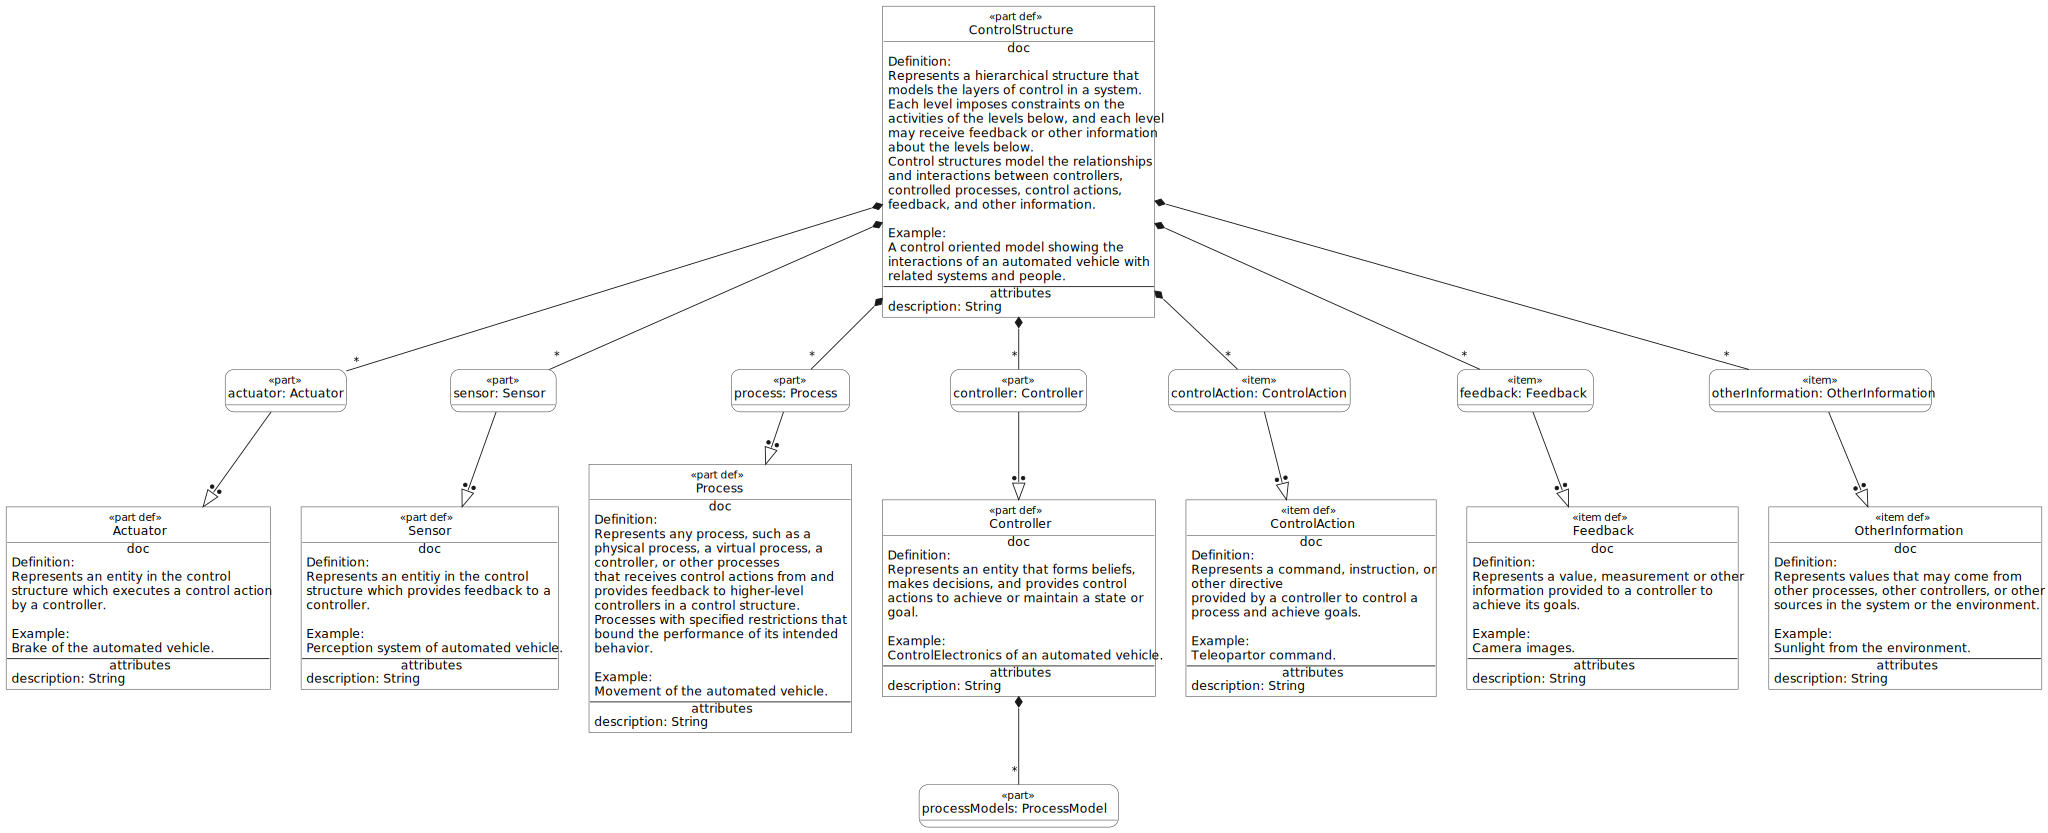

In [80]:
%viz LibrarySTPA::ModelControlStructure::ControlStructure LibrarySTPA::ModelControlStructure::Sensor LibrarySTPA::ModelControlStructure::Actuator LibrarySTPA::ModelControlStructure::Controller LibrarySTPA::ModelControlStructure::Feedback LibrarySTPA::ModelControlStructure::ControlAction LibrarySTPA::ModelControlStructure::Process LibrarySTPA::ModelControlStructure::OtherInformation --style TB

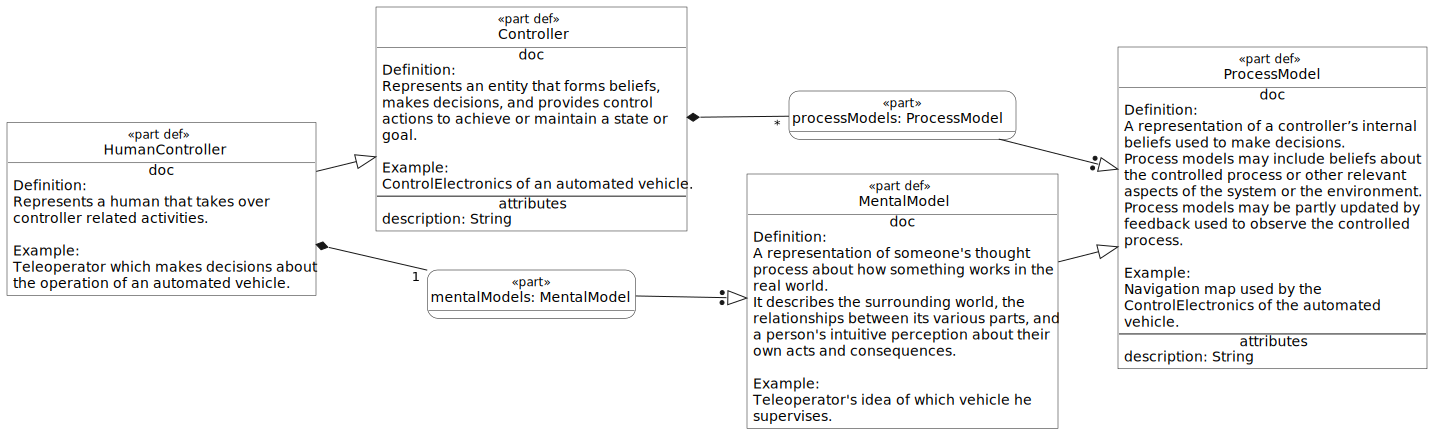

In [81]:
%viz LibrarySTPA::ModelControlStructure::ProcessModel LibrarySTPA::ModelControlStructure::MentalModel LibrarySTPA::ModelControlStructure::Controller LibrarySTPA::ModelControlStructure::HumanController --style LR

## Library Package 3: Third Step of STPA - Identify UCAs

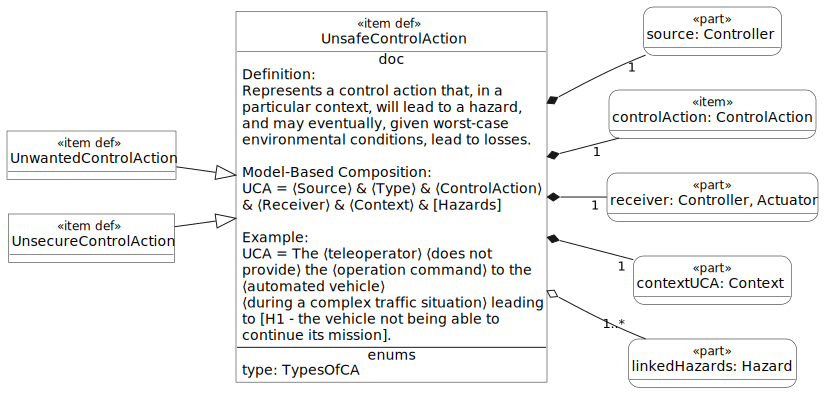

In [82]:
%viz LibrarySTPA::IdentifyUCAs::UnsafeControlAction LibrarySTPA::IdentifyUCAs::UnwantedControlAction LibrarySTPA::IdentifyUCAs::UnsecureControlAction --style LR

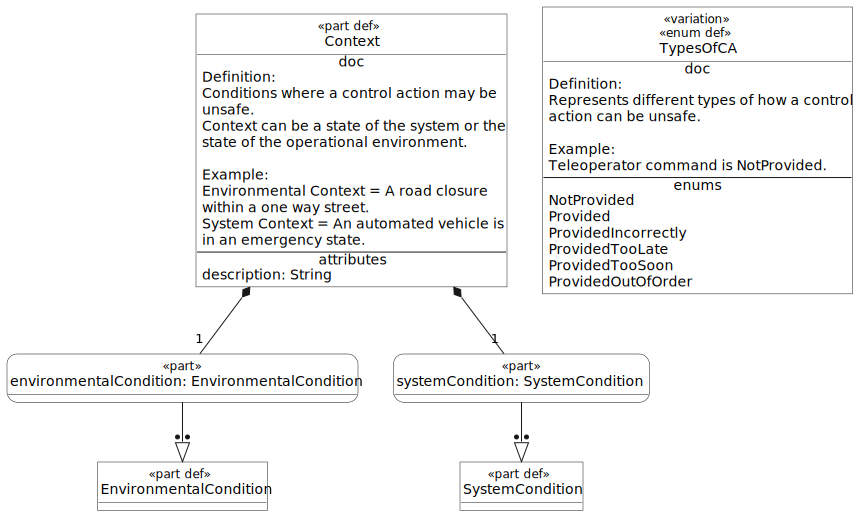

In [83]:
%viz LibrarySTPA::IdentifyUCAs::Context LibrarySTPA::IdentifyUCAs::EnvironmentalCondition LibrarySTPA::IdentifyUCAs::SystemCondition LibrarySTPA::IdentifyUCAs::TypesOfCA

## Library Package 4: Fourth Step of STPA - Identify LSs

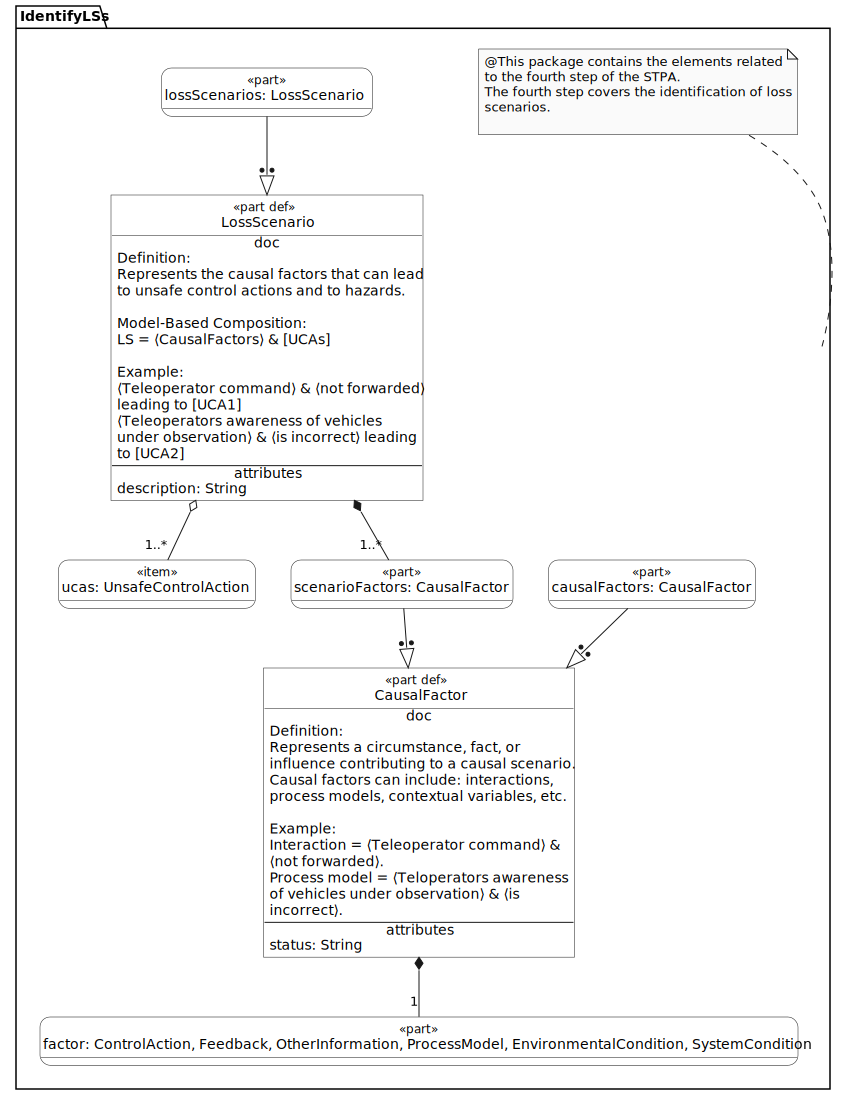

In [84]:
%viz LibrarySTPA::IdentifyLSs --style=TB

## Library Package 5: MetaData Types for STPA

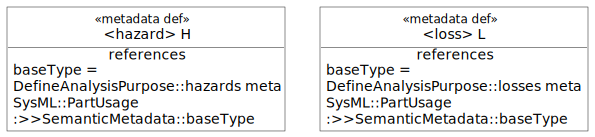

In [85]:
%viz LibrarySTPA::MetaTypesSTPA::hazard LibrarySTPA::MetaTypesSTPA::loss

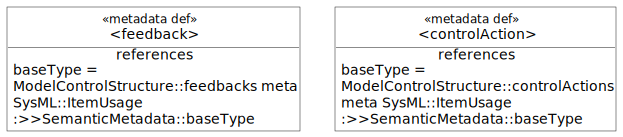

In [86]:
%viz LibrarySTPA::MetaTypesSTPA::feedback LibrarySTPA::MetaTypesSTPA::controlAction

## Library Package 6: Views and Viewpoints for STPA

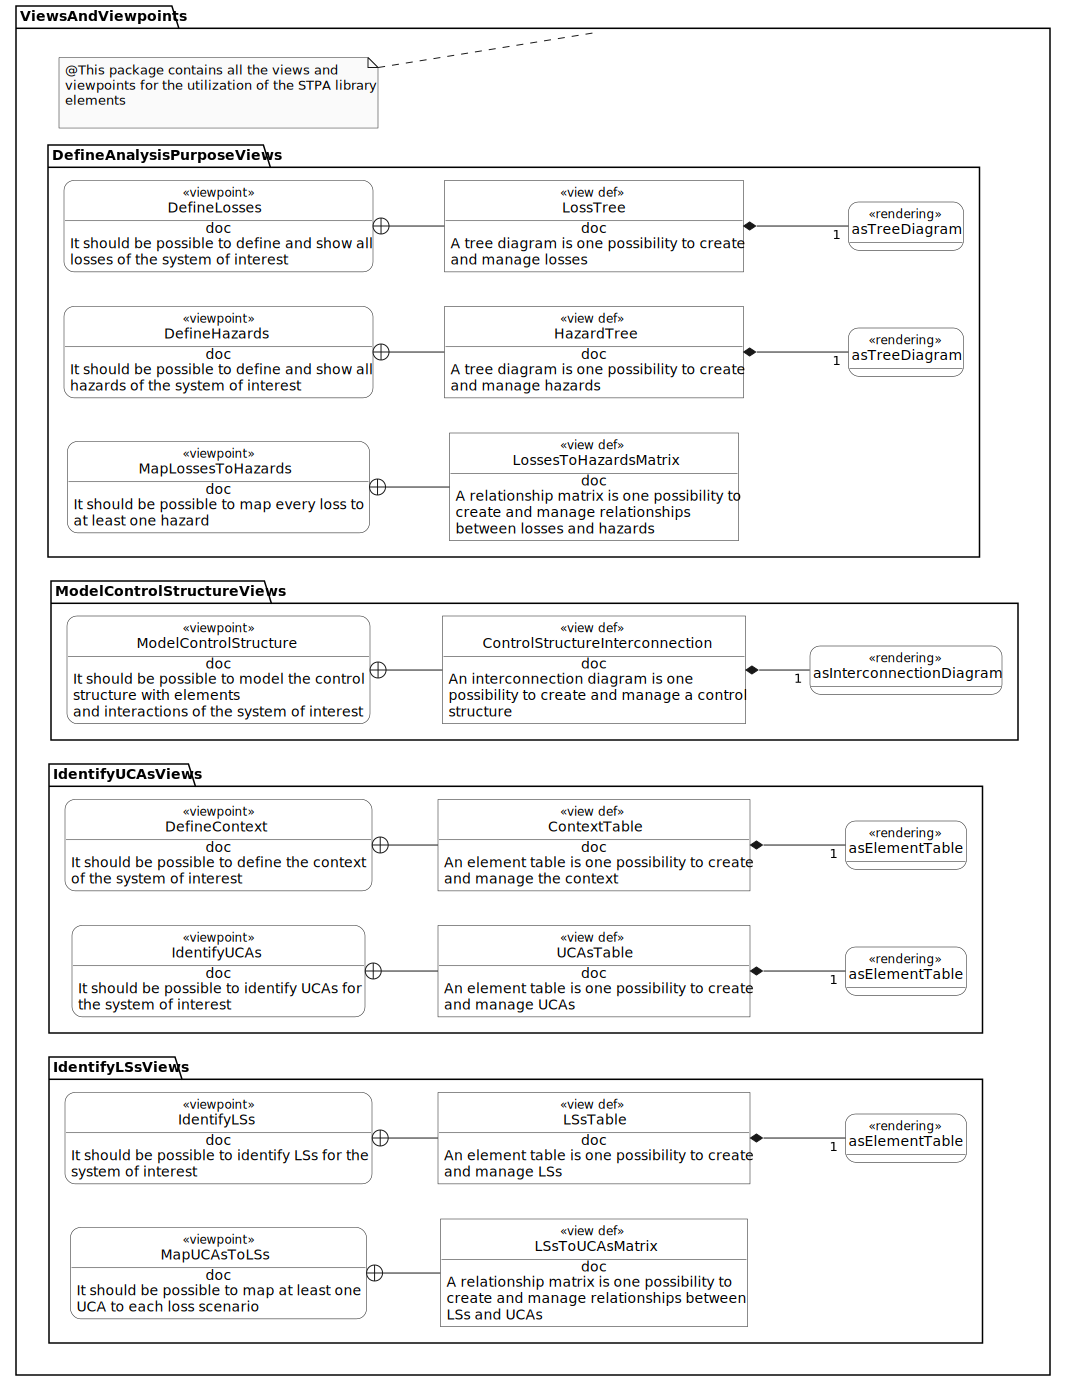

In [87]:
%viz LibrarySTPA::ViewsAndViewpoints --style LR

# Example Application of STPA Library

In [88]:
package PaperExample {
 
    import LibrarySTPA::DefineAnalysisPurpose::*;
    import LibrarySTPA::ModelControlStructure::*;
    import LibrarySTPA::IdentifyUCAs::*;
    import LibrarySTPA::IdentifyLSs::*;
    import LibrarySTPA::MetaTypesSTPA::*;
    import LibrarySTPA::ViewsAndViewpoints::DefineAnalysisPurposeViews::*;
    
    package DefineAnalysisPurpose { 
        package Stakeholders {            
            concern Safety {
                stakeholder Passenger;
                stakeholder Manufacturer;
                stakeholder Operator;
            }
            concern Reputation {
                stakeholder Manufacturer;
                stakeholder Operator;
            }
            concern Revenue {
                stakeholder Manufacturer;
                stakeholder Operator;
            }
        }
        package Losses {            
            #loss LossOfCustomerSatisfaction {
                :>> stakeholderConcern = Stakeholders::Reputation;
            }
            #loss DamageToInfrastructure {
                :>> stakeholderConcern = Stakeholders::Revenue;
            }
            #loss LossOfLife {
                :>> stakeholderConcern = Stakeholders::Safety;
            }
        }
        package Hazards {
            #hazard VehicleCanNotExecuteMission {
                :>> linkedLosses = Losses::LossOfCustomerSatisfaction;
            }
            #hazard VehicleComesToCloseToInfrastructure {
                :>> linkedLosses = Losses::DamageToInfrastructure;
            }
            #hazard VehicleComesTocloseToPeople {
                :>> linkedLosses = Losses::LossOfLife;
            }
        }
    }
    
    package ModelControlStructure {
        package Interactions {
            // Control Actions
            #controlAction OperationCommand;
            #controlAction ManeuverCMD;
            #controlAction BrakingForce;
            #controlAction SteeringForce;
            #controlAction IntentionToTravel;
            #controlAction IntentionToLeave;
            #controlAction EmergencyCall;
            
            // Feedback
            #feedback VehiclePosition;
            #feedback Acceleration;
            #feedback VehicleStatus;
            #feedback RoadIntegrity;
            #feedback RoadSigns;
            #feedback PositionVRUs;
            #feedback PositionOtherTraffic;
        }
        package Structure {
            part ControlStructureUshift{
                #controllerHuman Teleoperator {
                    //:>> mentalModels = CurrentWorkload;
                    #mentalModel CurrentWorkload;
                }
                #controller ControlElectronics {
                    //:>> processModels = VehicleLimitations;
                    #processModel VehicleLimitations;
                    #processModel OperationalMode;
                    #processModel UnderstandingOfPassengerBehavior;
                    #processModel AssumptionAboutRoadInfrastructure;
                    #processModel PassengerCapacity;
                }
                #sensor PerceptionSystem;
                #actuator DriveSystem;
                #controllerHuman Passenger {
                    #mentalModel UnderstandingOfVehicleBehavior;
                }
                #controller OtherTraffic;
                #controller VRUs;
                #controller Environment;
                #process VehicleMovement;
            }
            // Teleoperator to ControlElectronics
            flow of Interactions::OperationCommand from ControlStructureUshift.Teleoperator to ControlStructureUshift.ControlElectronics;
            // ControlElectronics to Teleoperator
            flow of Interactions::VehicleStatus from ControlStructureUshift.ControlElectronics to ControlStructureUshift.Teleoperator;
            // Control to Drive
            flow of Interactions::ManeuverCMD from ControlStructureUshift.ControlElectronics to ControlStructureUshift.DriveSystem;
            // Drive to Process
            flow of Interactions::BrakingForce from ControlStructureUshift.DriveSystem to ControlStructureUshift.VehicleMovement;
            flow of Interactions::SteeringForce from ControlStructureUshift.DriveSystem to ControlStructureUshift.VehicleMovement;          
            // Process to Perception
            flow of Interactions::Acceleration from ControlStructureUshift.VehicleMovement to ControlStructureUshift.PerceptionSystem;
            // Environment to Perception
            flow of Interactions::RoadIntegrity from ControlStructureUshift.Environment to ControlStructureUshift.PerceptionSystem;
            flow of Interactions::RoadSigns from ControlStructureUshift.Environment to ControlStructureUshift.PerceptionSystem;
            // VRU to Perception
            flow of Interactions::PositionVRUs from ControlStructureUshift.VRUs to ControlStructureUshift.PerceptionSystem;
            // OtherTraffic to Perception
            flow of Interactions::PositionOtherTraffic from ControlStructureUshift.OtherTraffic to ControlStructureUshift.PerceptionSystem;
            // Perception to ControlElectronics
            flow of Interactions::VehiclePosition from ControlStructureUshift.PerceptionSystem to ControlStructureUshift.ControlElectronics;
            flow of Interactions::PositionVRUs from ControlStructureUshift.PerceptionSystem to ControlStructureUshift.ControlElectronics;
            flow of Interactions::RoadIntegrity from ControlStructureUshift.PerceptionSystem to ControlStructureUshift.ControlElectronics;
            flow of Interactions::PositionOtherTraffic from ControlStructureUshift.PerceptionSystem to ControlStructureUshift.ControlElectronics;
            flow of Interactions::RoadSigns from ControlStructureUshift.PerceptionSystem to ControlStructureUshift.ControlElectronics;
            // Passenger to ControlElectronics
            flow of Interactions::IntentionToTravel from ControlStructureUshift.Passenger to ControlStructureUshift.ControlElectronics;
            flow of Interactions::IntentionToLeave from ControlStructureUshift.Passenger to ControlStructureUshift.ControlElectronics;
            flow of Interactions::EmergencyCall from ControlStructureUshift.Passenger to ControlStructureUshift.ControlElectronics;
        }
    }
    
    package IdentifyUCAs {
        package Contexts {
            // Context = ⟨SystemConditions⟩ & ⟨EnvironmentalConditions⟩
            #context EmergencyStateDueToClosedOneWayStreet {
                :>> systemConditions = EmergencyState;
                :>> environmentalConditions = ClosedOneWayStreet;
            }
            #sysCon EmergencyState;
            #envCon ClosedOneWayStreet;
        }
        package UCAs {
            // UCA = ⟨Source⟩ & ⟨Type⟩ & ⟨ControlAction⟩ & ⟨Receiver⟩ & ⟨Context⟩ & [Hazards]
            #uca TeleoperatorDoesNotProvideOperationCommand : UnsafeControlAction {
                :>> description = "Teleoperator does not provide operation command when the automated vehicle is in an emergency situation";
                :>> source = ModelControlStructure::Structure::ControlStructureUshift.Teleoperator;
                :>> controlAction = ModelControlStructure::Interactions::OperationCommand;
                :>> type = typesOfCA.NotProvided;
                :>> receiver = ModelControlStructure::Structure::ControlStructureUshift.ControlElectronics;
                :>> contextUCA = Contexts::EmergencyStateDueToClosedOneWayStreet;
                :>> linkedHazards = DefineAnalysisPurpose::Hazards::VehicleCanNotExecuteMission;   
            }
        }
    }
    
    package IdentifyLSs {
        package CausalFactors {
            #cf TeleoperatorNotInformed {
                :>> factor = ModelControlStructure::Interactions::VehicleStatus;
                :>> status = "not forwarded";
            }
        }
        package LossScenarios {
            #ls TeleoperatorNotAwareOfVehiclesEmergencySituation {   
                // LS = ⟨CausalFactors⟩ & [UCAs]
                :>> description = "The automated vehicle drives into a one way street which is closed and can not resolve the situation. However, the teleoperator is not aware that he is responsible for the vehicle. As a result, the teleoperator does not provide a resolving operation command.";
                :>> scenarioFactors = CausalFactors::TeleoperatorNotInformed;
                :>> ucas = IdentifyUCAs::UCAs::TeleoperatorDoesNotProvideOperationCommand;
            }
        }
    }
    
    package Views {
        view ShowLosses : DefineLosses::LossTree {
            expose DefineAnalysisPurpose::Losses::*;
        }
    }
}

Package PaperExample (1b77caab-b26e-4e99-8aa4-76fd0b89b4f4)


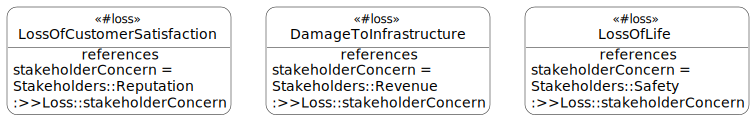

In [89]:
%view PaperExample::Views::ShowLosses --style=hidemetadata

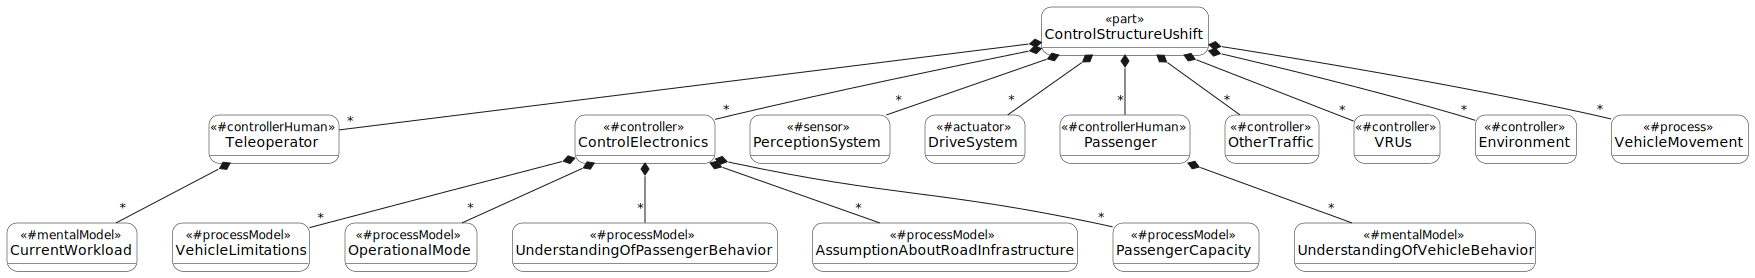

In [90]:
%viz PaperExample::ModelControlStructure::Structure::ControlStructureUshift --style hidemetadata --style=TB

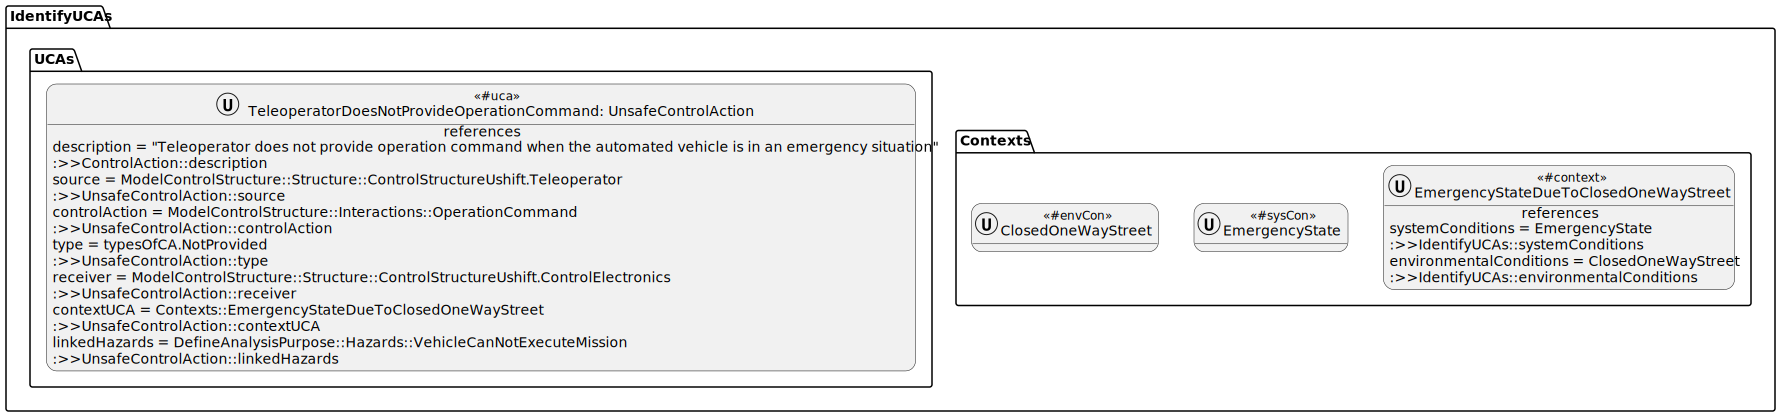

In [91]:
%viz PaperExample::IdentifyUCAs --view tree --style=plantuml --style=hidemetadata

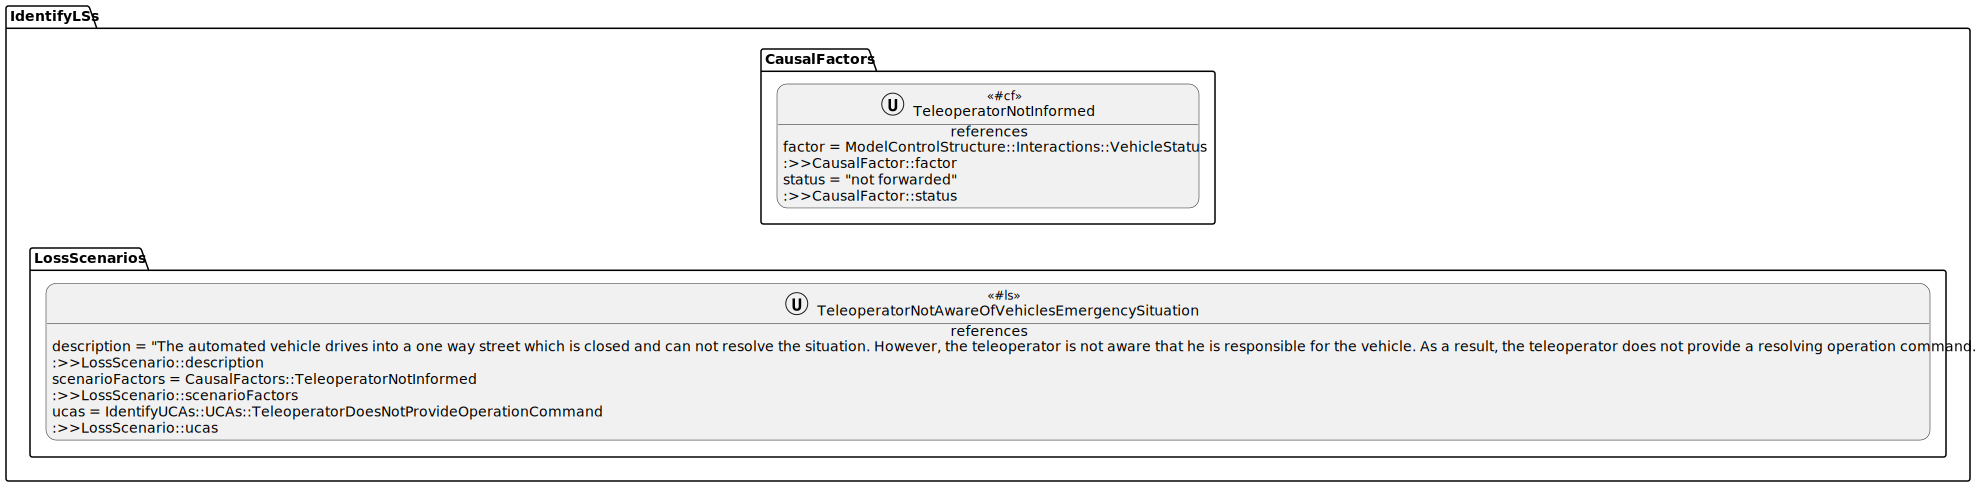

In [92]:
%viz PaperExample::IdentifyLSs --view=tree --style=plantuml --style=LR --style=hidemetadata

## Overview of Library Packages

In [93]:
library package LibraryPackagesSTPA {
    package '6. ViewsAndViewpoints' {
        doc /* 
            This package contains
            all the views and 
            viewpoints for the 
            utilization of the 
            STPA library elements
        */
    }
    package '5. MetaDataSTPA' {
        doc /* 
            This package contains 
            all the meta types for 
            the STPA library elements
        */    
    }
    package '4. IdentifyLSs' {
        doc /* 
            This package contains 
            the elements related to
            the fourth step of the STPA.
            The fourth step covers
            the identification of 
            loss scenarios.
        */
    }
    package '3. IdentifyUCAs' {
        doc /* 
            This package contains
            the elements related to 
            the third step of the STPA.
            The third step covers 
            the identification of 
            unsafe control actions.
        */   
    }
    package '2. ModelControlStructure' {
        doc /* 
            This package contains 
            the elements related to 
            the second step of the STPA.
            The second step covers 
            the modelling of the
            control structure.
        */ 
    }
    package '1. DefineAnalysisPurpose' {
        doc /*  
            This package contains 
            the elements related to 
            the first step of the STPA. 
            The first step covers 
            the definition of losses 
            and hazards as the 
            baseline for the analysis.
        */
    }
    
}

LibraryPackage LibraryPackagesSTPA (940a808f-ce15-4e3b-8284-6af92e5fe099)


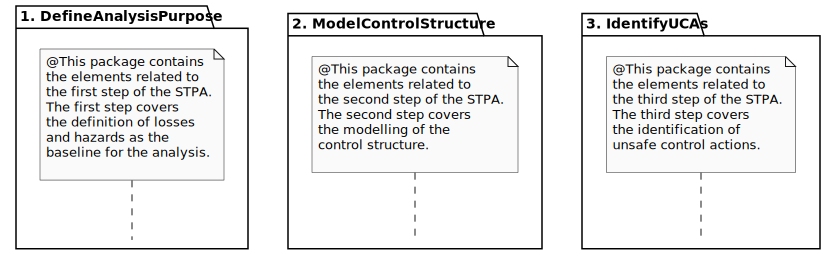

In [94]:
%viz LibraryPackagesSTPA::"1. DefineAnalysisPurpose" LibraryPackagesSTPA::"2. ModelControlStructure" LibraryPackagesSTPA::"3. IdentifyUCAs"

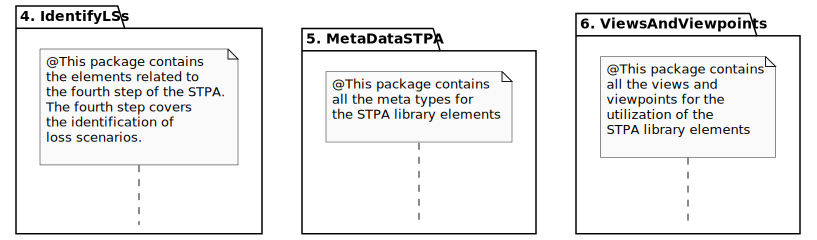

In [95]:
%viz LibraryPackagesSTPA::"4. IdentifyLSs" LibraryPackagesSTPA::"5. MetaDataSTPA" LibraryPackagesSTPA::"6. ViewsAndViewpoints"

# Helpful Commands

In [96]:
%viz -h

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

In [97]:
%view -h

Usage: %view [--render=<RENDERING>] [--style=<STYLE>...] <NAME>

Render the view specified by the view usage <NAME>. <NAME> must be fully qualified.
If the view usage has a rendering, this overrides the rendering given in the render option.

<RENDERING> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Sho

In [98]:
%publish -h

Usage: %publish <NAME>

Publish the model elements rooted in <NAME> to the repository. <NAME> must be fully qualified.
